In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
% matplotlib inline
measurement = pd.read_csv('body_measurement.csv')

In [82]:
measurement['Date'] = pd.to_datetime(measurement['Date'])

### Inferences about my body

In [75]:
measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
Date           214 non-null object
Weight         214 non-null float64
Fat            214 non-null float64
Viceral Fat    214 non-null int64
Muscle         214 non-null float64
BodyAge        214 non-null int64
RM             214 non-null int64
BMI            214 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 13.5+ KB


The data seems clean, but how about duplicated data?

#### Duplicated lines

In [20]:
print("Number of duplicated lines: {0}".format(sum(measurement.duplicated())))

Number of duplicated lines: 0


Let's see some visual data about my body data

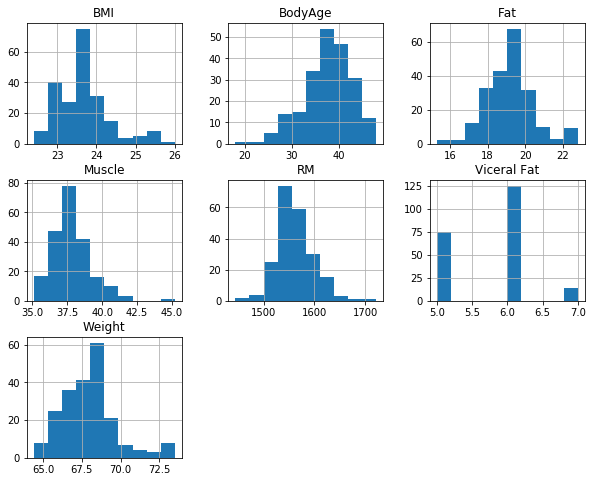

In [76]:
measurement.hist(figsize = (10,8));

Below is my Weight in a histogram. I can see that my median weight is about 69-ish

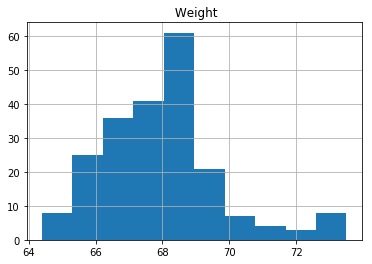

In [16]:
measurement.iloc[:,1:2].hist();

Let's see some information when the data is crossed

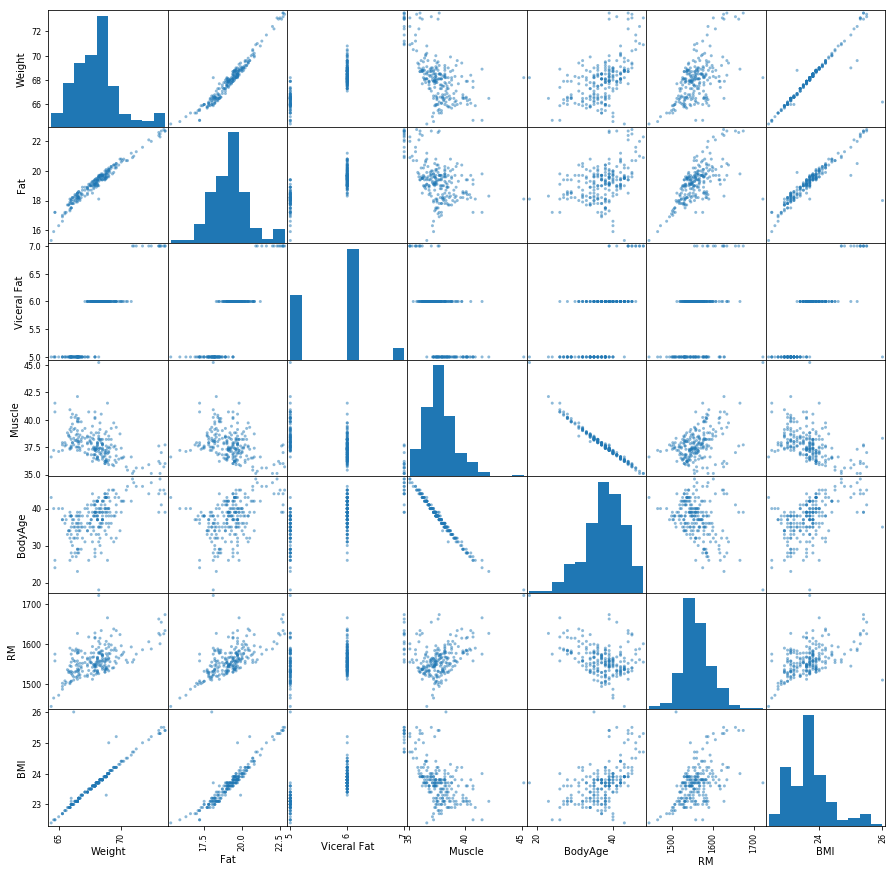

In [83]:
pd.plotting.scatter_matrix(measurement, figsize=(15,15));

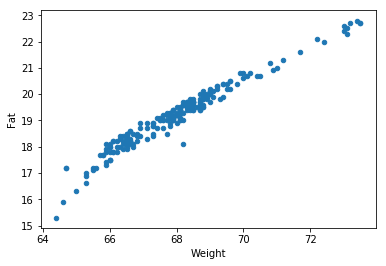

In [78]:
measurement.plot(x='Weight', y='Fat', kind='scatter');

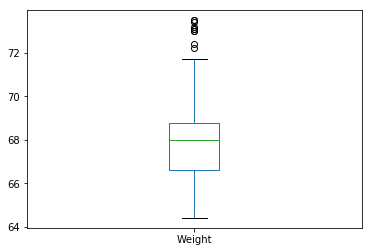

In [79]:
measurement.iloc[:,1:2].plot(kind='box');

In [87]:
measurement.tail(30)

,Date,Weight,Fat,Viceral Fat,Muscle,BodyAge,RM,BMI
188,2018-05-10,68.0,19.2,6,37.3,39,1550,23.7
189,2018-05-11,68.8,19.8,6,37.0,40,1560,23.9
190,2018-05-12,68.3,19.5,6,37.4,39,1557,23.8
191,2018-05-13,68.1,19.0,6,36.5,42,1530,23.7
192,2018-05-14,67.8,18.9,6,36.8,41,1532,23.6
193,2018-05-15,68.2,19.3,6,37.1,40,1548,23.7
194,2018-05-16,69.2,20.2,6,37.7,38,1585,24.1
195,2018-05-17,68.7,19.4,6,36.0,44,1530,23.9
196,2018-05-18,69.0,20.0,6,37.1,40,1565,24.0
197,2018-05-19,68.3,19.6,6,38.1,36,1577,23.8


### Weight over time

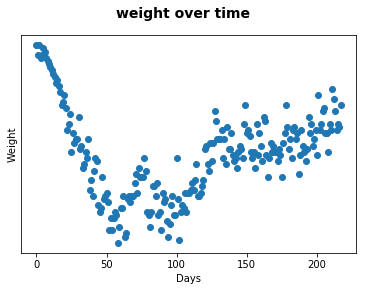

In [106]:
index = measurement.index
weight = measurement.iloc[:, 1:2]
plt.scatter(index, weight)
plt.suptitle('weight over time', fontsize=14, fontweight='bold')
plt.ylabel('Weight')
plt.xlabel('Days')
plt.yticks([])
plt.show()

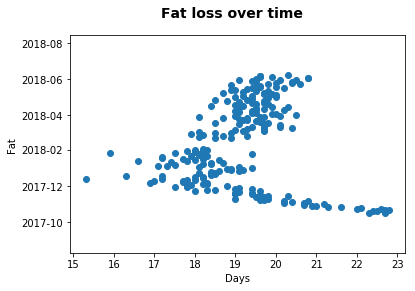

In [103]:

plt.scatter(measurement['Fat'], list(measurement.Date.values))
plt.suptitle('Fat loss over time', fontsize=14, fontweight='bold')
plt.ylabel('Fat')
plt.xlabel('Days')
plt.show()

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


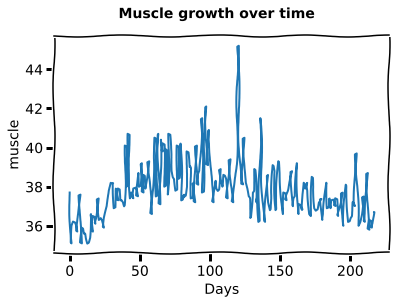

In [114]:
with plt.xkcd():
    muscle = measurement.iloc[:, 4:5]
    #plt.scatter(index, muscle)
    plt.plot(index, muscle)
    plt.suptitle('Muscle growth over time', fontsize=14, fontweight='bold')
    plt.ylabel('muscle')
    plt.xlabel('Days')
    plt.show()

In [104]:
measurement.describe()

,Weight,Fat,Viceral Fat,Muscle,BodyAge,RM,BMI
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,68.009174,19.209174,5.720183,37.766514,37.252294,1559.853211,23.682569
std,1.738824,1.231577,0.575743,1.392285,5.113966,37.086106,0.627899
min,64.400000,15.300000,5.000000,35.100000,18.000000,1444.000000,22.400000
25%,66.600000,18.400000,5.000000,36.900000,35.000000,1536.000000,23.200000
50%,68.000000,19.300000,6.000000,37.600000,38.000000,1556.500000,23.700000
75%,68.800000,19.775000,6.000000,38.400000,40.750000,1578.750000,23.900000
max,73.500000,22.800000,7.000000,45.200000,48.000000,1722.000000,26.000000
